In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [5]:
df=pd.read_csv('titanic_toy.csv')
df.head(5)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [7]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [9]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [10]:
X=df.drop(columns=['Survived'])
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
X_train.head(5)

,Age,Fare,Family
445,4.0,81.8583,2
650,NaN,7.8958,0
172,1.0,11.1333,2
450,36.0,27.7500,3
314,43.0,26.2500,2


In [13]:
y_train.head(5)

445    1
650    0
172    1
450    0
314    0
Name: Survived, dtype: int64

In [14]:
X_train.shape , X_test.shape

((623, 3), (268, 3))

In [15]:
y_train.shape, y_test.shape

((623,), (268,))

In [17]:
X_train.isnull().mean()*100

Age       19.903692
Fare       4.815409
Family     0.000000
dtype: float64

In [21]:
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()

In [22]:
X_train['mean_age']=X_train['Age'].fillna(mean_age)
X_train['median_age']=X_train['Age'].fillna(median_age)

X_train['mean_fare']=X_train['Fare'].fillna(mean_fare)
X_train['median_fare']=X_train['Fare'].fillna(median_fare)

In [23]:
X_train.head(8)

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
445,4.0,81.8583,2,4.000000,4.0,81.8583,81.8583
650,NaN,7.8958,0,29.256353,28.0,7.8958,7.8958
172,1.0,11.1333,2,1.000000,1.0,11.1333,11.1333
450,36.0,27.7500,3,36.000000,36.0,27.7500,27.7500
314,43.0,26.2500,2,43.000000,43.0,26.2500,26.2500
332,38.0,153.4625,1,38.000000,38.0,153.4625,153.4625
801,31.0,26.2500,2,31.000000,31.0,26.2500,26.2500
90,29.0,8.0500,0,29.000000,29.0,8.0500,8.0500


In [28]:
# age and fare variables variance
print('original age var variance', X_train['Age'].var())
print('original mean age var variance', X_train['mean_age'].var())
print('original median age var variance', X_train['median_age'].var())

print('original fare var variance', X_train['Fare'].var())
print('original mean fare var variance', X_train['mean_fare'].var())
print('original median fare var variance', X_train['median_fare'].var())

original age var variance 211.95188064643307
original mean age var variance 169.69780797736954
original median age var variance 169.94984651902135
original fare var variance 2666.9296723129796
original mean fare var variance 2538.2996238091378
original median fare var variance 2552.1099348908224


In [29]:
# ~20% missing data variance decreased from 211 to 169 that's fair
# for 5% missing data in fare column variance decreased from 2666 to 2538(mean), and meadian(2552)

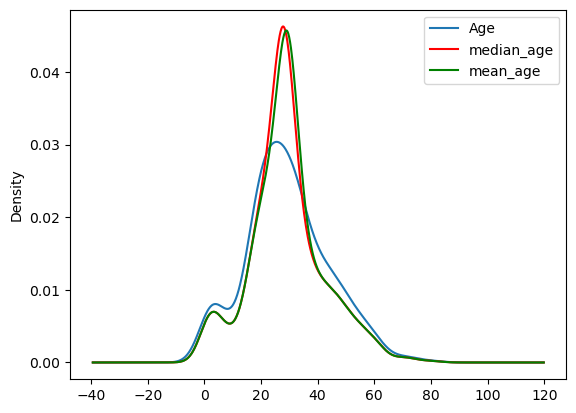

In [31]:
#age

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['median_age'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['mean_age'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [32]:
#applying mean median imputation (20% data missing) will increase the height at where mean of the data lies, the graph is totally valid.

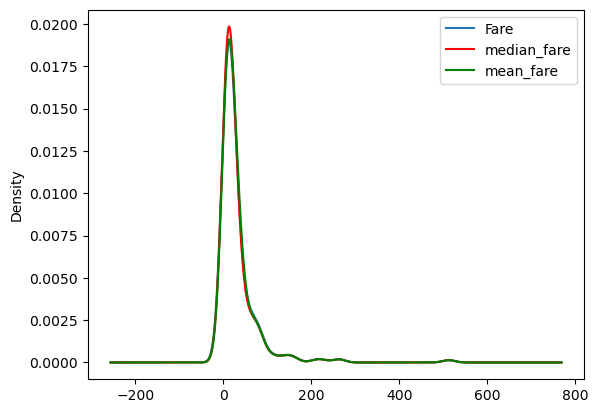

In [34]:
#for fare where only 5% of data is missing, there should be a small change subtle change to keep things balanced
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['median_fare'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['mean_fare'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [35]:
#covariance and correleation
X_train.cov()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,211.951881,71.822073,-6.932603,211.951881,211.951881,67.757268,65.775061
Fare,71.822073,2666.929672,18.612474,56.998513,59.765747,2666.929672,2666.929672
Family,-6.932603,18.612474,2.997027,-5.550541,-5.533529,17.714766,17.767537
mean_age,211.951881,56.998513,-5.550541,169.697808,169.697808,54.249388,52.662348
median_age,211.951881,59.765747,-5.533529,169.697808,169.949847,56.883154,55.227061
mean_fare,67.757268,2666.929672,17.714766,54.249388,56.883154,2538.299624,2538.299624
median_fare,65.775061,2666.929672,17.767537,52.662348,55.227061,2538.299624,2552.109935


In [36]:
X_train.corr()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,1.000000,0.088197,-0.310167,1.000000,1.000000,0.085804,0.083017
Fare,0.088197,1.000000,0.205140,0.084564,0.088616,1.000000,1.000000
Family,-0.310167,0.205140,1.000000,-0.246123,-0.245186,0.203104,0.203157
mean_age,1.000000,0.084564,-0.246123,1.000000,0.999258,0.082658,0.080023
median_age,1.000000,0.088616,-0.245186,0.999258,1.000000,0.086607,0.083857
mean_fare,0.085804,1.000000,0.203104,0.082658,0.086607,1.000000,0.997291
median_fare,0.083017,1.000000,0.203157,0.080023,0.083857,0.997291,1.000000


<Axes: >

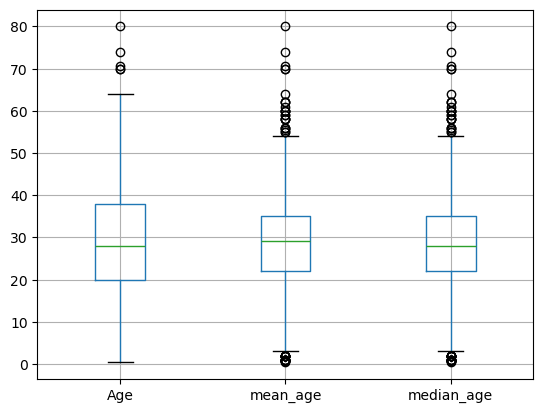

In [38]:
#outliers
X_train[['Age', 'mean_age', 'median_age']].boxplot()

In [39]:
#interquantile range shrinked due to mean-median imputation and value which were at extremes are conveyed as outliers 

<Axes: >

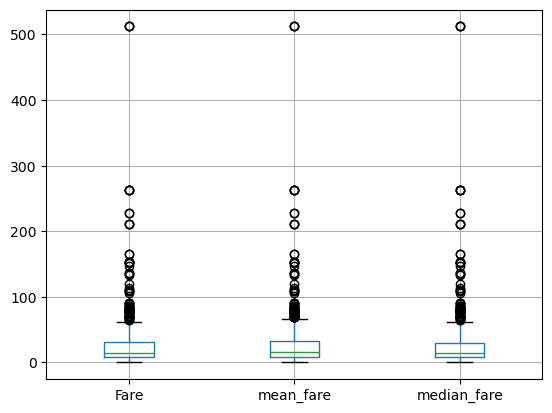

In [40]:
#outliers
X_train[['Fare', 'mean_fare', 'median_fare']].boxplot()

In [42]:
#no drastic change seen in fare